<a href="https://colab.research.google.com/github/yanuar-pribadii/Mall-Clustering/blob/main/mall_customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **DTI_2020 Muhammad Yanuar Pribadi DS02_16**
## ***CLUSTERING***
Clustering adalah teknik mengorganisasi sebuah dataset menjadi beberapa kelas atau cluster yang dimana data di sebuah kelas atau cluster tersebut memiliki karakteristik yang sama, namun karakter antar kelas akan memiliki sifat yang berbeda agar dapat dibedakan.

Pada latihan kali ini akan meng-cluster pelanggan mall yang dimana tujuannnya mencari kelas pelanggan mana yang cocok untuk mall tersebut.

Pada dataset tersebut diberikan data membership pelanggan mall yang terdiri dari 5 atribut, yaitu:


1.   CustomerID : Nomor ID Kartu Pelanggan
2.   Age : Umur Pelanggan
3.   Gender : Jenis Kelamin Pelanggan
4.   Annual Income : Pendapatan Konsumen perTahun ($)
5.   Spending Score : Nilai Pembelanjaan Pelanggan Berdasaran Perilaku Pelanggan dan Data Pembelanjaan Pelanggan





**Import Libraries Yang Digunakan**

In [433]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Import Raw Dataset Mall**

In [434]:
# Import Dataset
df_mall = pd.read_csv('https://raw.githubusercontent.com/yanuar-pribadii/Mall-Clustering/main/Mall_Customers.csv')
df_mall = df_mall.drop('CustomerID', axis=1)
df_mall.columns = ['Gender', 'Age', 'Income', 'Score']
df_mall

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [435]:
# Prints the Dataset Information
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [436]:
# Prints Descriptive Statistics
df_mall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [437]:
#mengecek apakah ada null value pada dataset
df_mall.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

Mantap! tidak ada data null atau kosong yang berarti dataset dapat langsung kita proses tanpa harus menggantikan null data value nya dulu

**Exploratory Data Analysis**

EDA diperlukan untuk mengetahui apa saja informasi yang ada didalam dataset

Mengatahui distribusi antara Age, Income, dan Score antar gender

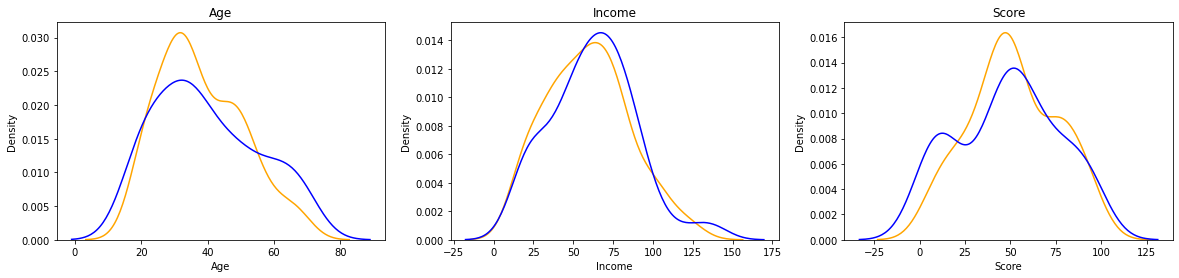

In [438]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df_mall.Age[df_mall['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df_mall.Age[df_mall['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df_mall.Income[df_mall['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df_mall.Income[df_mall['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Income')

plt.subplot(1,3,3)
sns.distplot(df_mall.Score[df_mall['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df_mall.Score[df_mall['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Score')

plt.show()

Dengan menggunakan boxplot kita dapat lebih detail mengetahui seperti kuartil, outlier,mean pada dataset

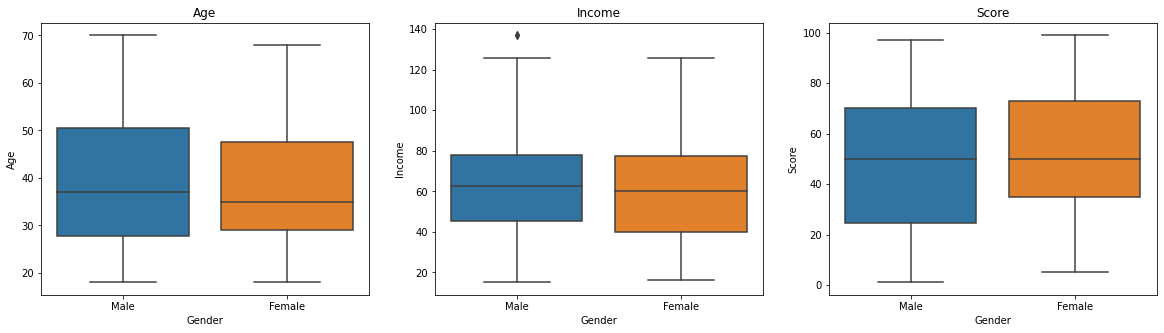

In [439]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df_mall.Gender, y=df_mall.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df_mall.Gender, y=df_mall.Income)
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(x=df_mall.Gender, y=df_mall.Score)
plt.title('Score')

plt.show()

**Relationship Antara Variabel**

Disini kita akan mengecek apakah antar variabel memiliki Relationship

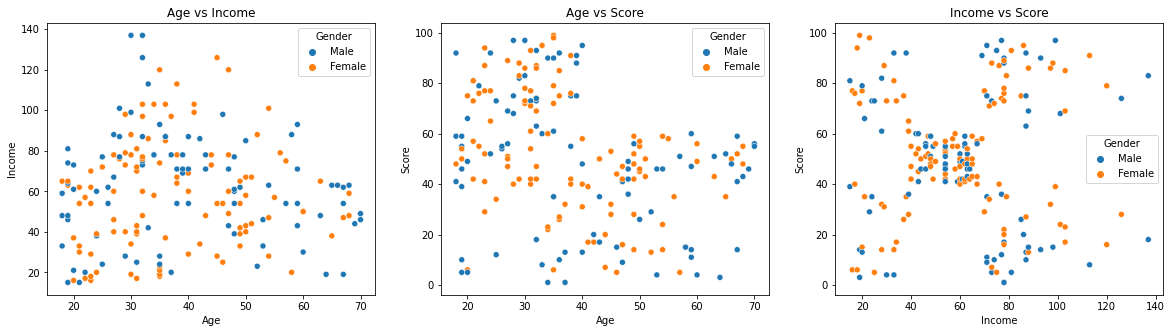

In [440]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df_mall.Age, y=df_mall.Income, hue=df_mall.Gender)
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(x=df_mall.Age, y=df_mall.Score, hue=df_mall.Gender)
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(x=df_mall.Income, y=df_mall.Score, hue=df_mall.Gender)
plt.title('Income vs Score')

plt.show()

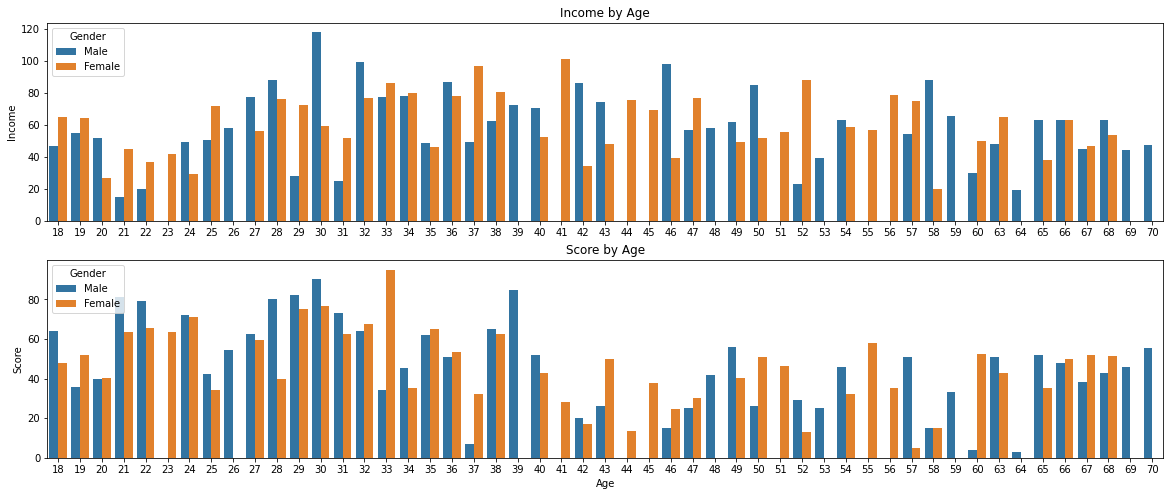

In [441]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df_mall.Age, y=df_mall.Income, hue=df_mall.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df_mall.Age, y=df_mall.Score, hue=df_mall.Gender, ci=0)
plt.title('Score by Age')

plt.show()

# ***Data Preprocessing***

 Membandingkan antar variabel di dataset

Text(0.5, 1.0, 'Income vs Score')

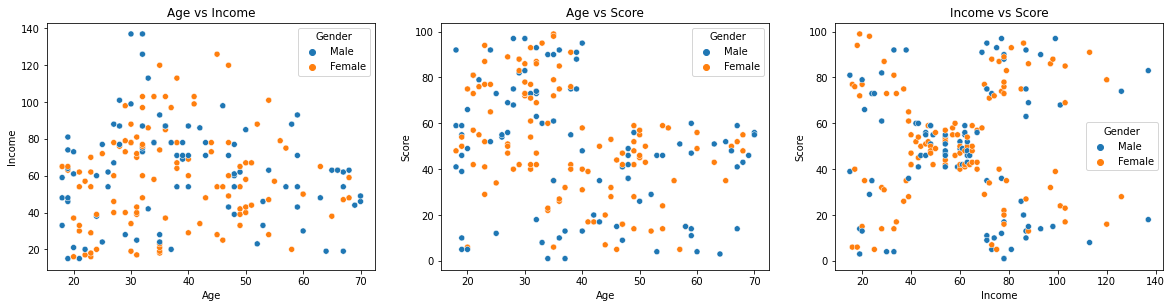

In [443]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.scatterplot(x=df_mall.Age, y=df_mall.Income, hue=df_mall.Gender)
plt.title('Age vs Income')

plt.subplot(2,3,2)
sns.scatterplot(x=df_mall.Age, y=df_mall.Score, hue=df_mall.Gender)
plt.title('Age vs Score')

plt.subplot(2,3,3)
sns.scatterplot(x=df_mall.Income, y=df_mall.Score, hue=df_mall.Gender)
plt.title('Income vs Score')



In [444]:
#one hot encoding, keeping just male column, so 1 = male, 0 = female
df_mall = pd.get_dummies(df_mall, columns=['Gender'], drop_first=True)       
df_mall = df_mall.rename(columns={'Gender_Male':'Gender'})

In [445]:
df_prepared = df_mall.copy()

In [446]:
df_prepared.head()

,Age,Income,Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [447]:
df_prepared.drop(['Gender', 'Age'], axis=1, inplace=True)
df_prepared.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [448]:
df_std = df_prepared.copy()

In [449]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_std.columns.tolist()
df_std[column_names] = scaler.fit_transform(df_std[column_names])
df_std.sort_index(inplace=True)
df_std.head()


,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# ***Clustering Using K-Means***

**Elbow Method**

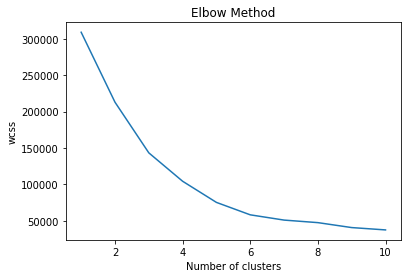

In [450]:
# Transform Data Frame to Numpy Array
income = df_mall.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Ketika melihat grafik Elbow diatas, nilai 2,3,4,5 seperrtinya nilai terbaik untuk menentukan nilai cluster nya, namun akan lebih baik lagi jika kita bandingkan antar nilai elbow diatas

In [465]:
# collect cluster labels as well as cluster centers
clusters = [2,3,4,5]
cluster_centers = {}

for c in clusters:
    km = KMeans(n_clusters=c).fit(df_mall[['Age', 'Income', 'Score']])
    df_mall['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

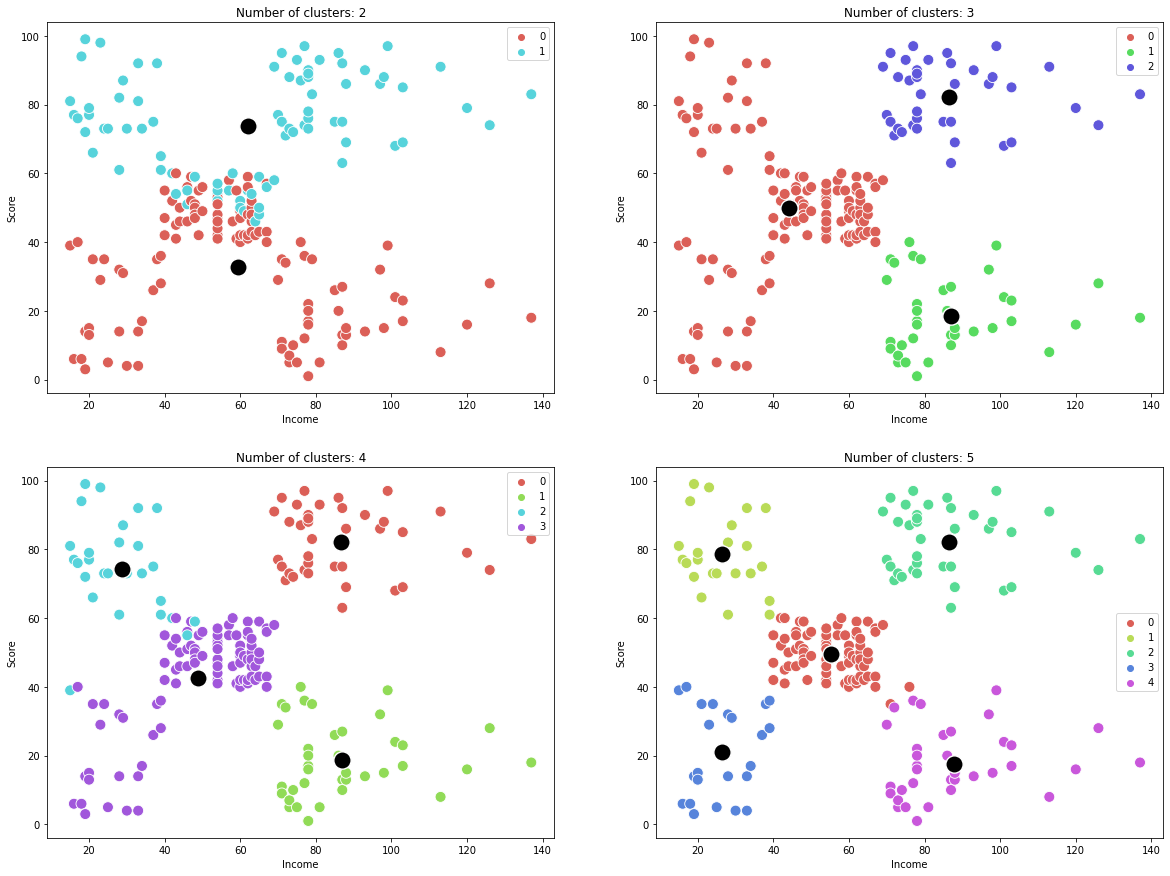

In [466]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df_mall.Income, df_mall.Score, df_mall['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

In [467]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29307334005502633
For n_clusters=3, The Silhouette Coefficient is 0.383798873822341
For n_clusters=4, The Silhouette Coefficient is 0.4052954330641215
For n_clusters=5, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=6, The Silhouette Coefficient is 0.45206493204632353
For n_clusters=7, The Silhouette Coefficient is 0.438510412713983
For n_clusters=8, The Silhouette Coefficient is 0.4294563708430266
For n_clusters=9, The Silhouette Coefficient is 0.40972631750190547
For n_clusters=10, The Silhouette Coefficient is 0.383184564192097


setelah nilai cluster dibandngkan, bahwa nilai cluster 5 adalah yang terbaik karena dataset tersebar merata dan memiliki nilai centroid nya

lalu kita akan membandingkan cluster antar variabel manakah yang memiliki 5 cluster

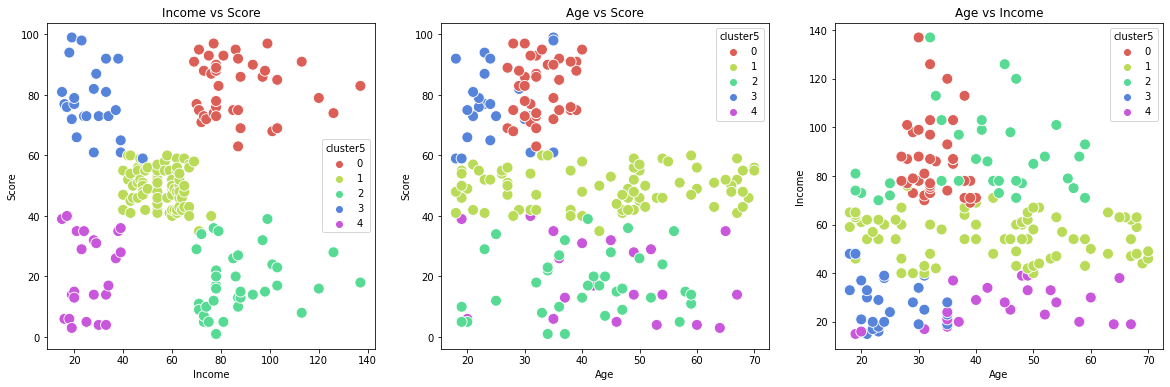

In [454]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(df_mall.Income, df_mall.Score, df_mall['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Income vs Score')
   
plt.subplot(1,3,2)
sns.scatterplot(df_mall.Age, df_mall.Score, df_mall['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(df_mall.Age, df_mall.Income, df_mall['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Income')

plt.show()

MANTAP, ternyata setelah kita bandingkan bahwa variabel Income dan Score memiliki 5 cluster, yang berarti akan kita gunakan sebagai penentu target pelanggan kita berdasarkan Income dan Score pembelanjaannya

# ***Hierarchical Clustering***

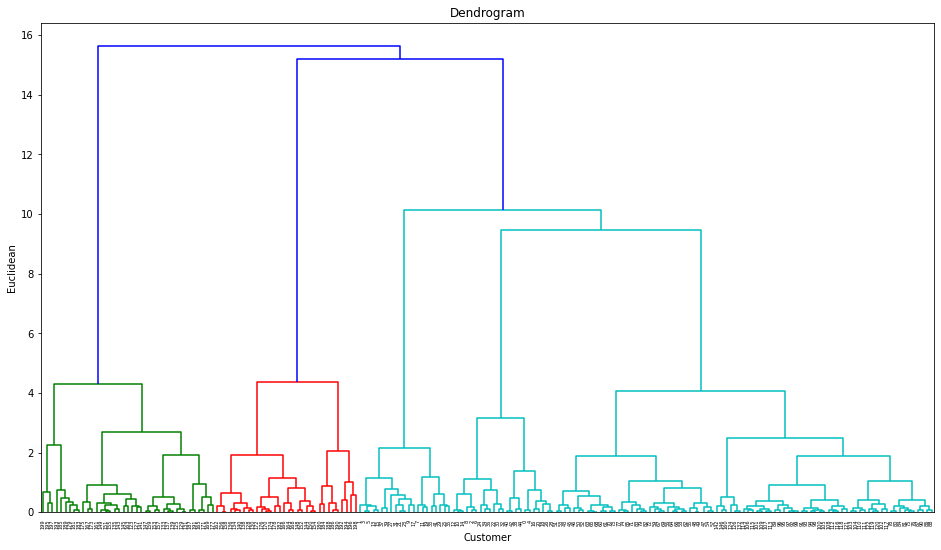

In [459]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16, 9))
dend = sch.dendrogram(sch.linkage(df_std, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

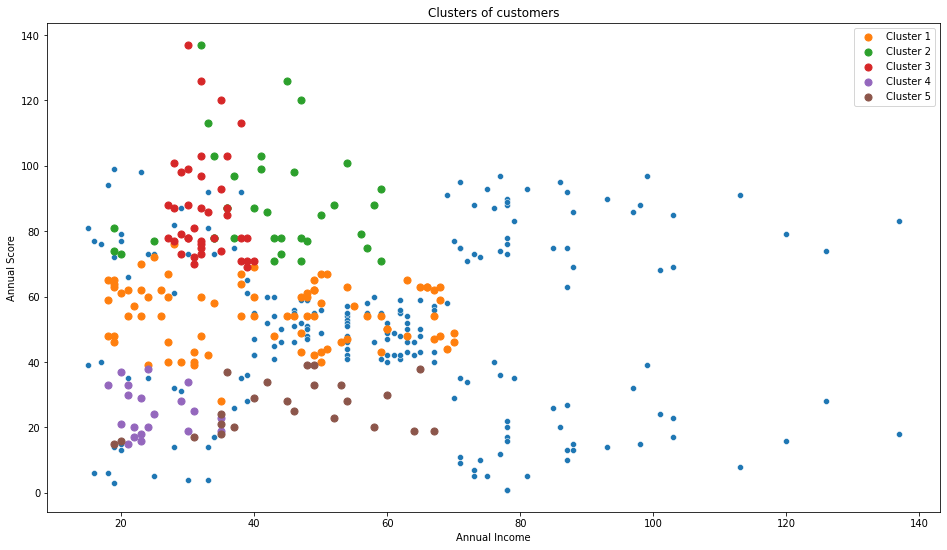

In [478]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)


# Visualising Clusters for k=5
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Income', y='Score', data=df_mall)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[hcluster == 3, 0], income[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[hcluster == 4, 0], income[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Score')
plt.legend()
plt.show()

In [491]:
# Add Cluster Information to the Raw Data
df_mall['Cluster']
df_mall.head()

,Age,Income,Score,Gender,cluster2,cluster3,cluster4,cluster5,cluster,KMeans cluster,cluster6,Cluster
0,19,15,39,1,0,0,2,3,2,2,5,2
1,21,15,81,1,1,0,2,1,2,2,1,2
2,20,16,6,0,0,0,3,3,2,2,5,2
3,23,16,77,0,1,0,2,1,2,2,1,2
4,31,17,40,0,0,0,3,3,2,2,5,2


# **Kesimpulan**

Berdasarkan Clustering yang sudah kita lakukan diatas **dan melihat pada kolom cluster5 (yang artinya adalah menggunakan 5 kelas Clustering yang digunakan)**, maka dapat kita simpulkan bahwa



*   Pelanggan yang memiliki Nilai Spending Score dan Income Rendah berada pada **Cluster 4**
*   Pelanggan yang memiliki Nilai Spending Score Tinggi dan Income Rendah berada pada **Cluster 3**
*   Pelanggan yang memiliki Nilai Spending Score Menengah dan Income Menengah berada pada **Cluster 1**
*   Pelanggan yang memiliki Nilai Spending Score Rendah dan Income Tinggi berada pada **Cluster 2**
*   Pelanggan yang memiliki Nilai Spending Score Tinggi dan Income Tinggi berada pada **Cluster 0**





